In [1]:
import numpy as np
import matplotlib.pyplot as plt

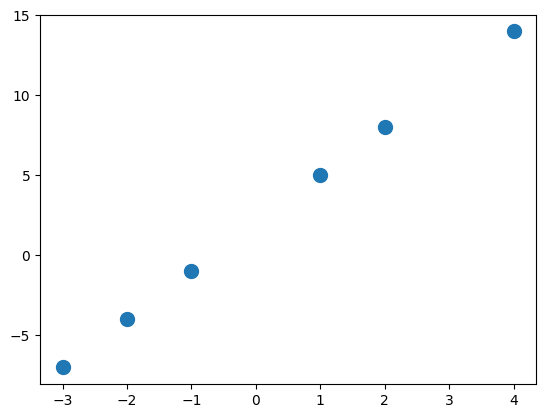

In [24]:
x = np.array([-3,-2,-1,1,2,4])
y = np.array([-7,-4,-1,5,8,14])

plt.plot(x, y, 'o', label='Original data', markersize=10)

m:  -1 c:  -1 error:  638
m:  -1 c:  0 error:  600
m:  -1 c:  1 error:  574
m:  -1 c:  2 error:  560
m:  0 c:  -1 error:  387
m:  0 c:  0 error:  351
m:  0 c:  1 error:  327
m:  0 c:  2 error:  315
m:  1 c:  -1 error:  206
m:  1 c:  0 error:  172
m:  1 c:  1 error:  150
m:  1 c:  2 error:  140
m:  2 c:  -1 error:  95
m:  2 c:  0 error:  63
m:  2 c:  1 error:  43
m:  2 c:  2 error:  35
m:  3 c:  -1 error:  54
m:  3 c:  0 error:  24
m:  3 c:  1 error:  6
m:  3 c:  2 error:  0
m:  4 c:  -1 error:  83
m:  4 c:  0 error:  55
m:  4 c:  1 error:  39
m:  4 c:  2 error:  35
m:  5 c:  -1 error:  182
m:  5 c:  0 error:  156
m:  5 c:  1 error:  142
m:  5 c:  2 error:  140
m:  6 c:  -1 error:  351
m:  6 c:  0 error:  327
m:  6 c:  1 error:  315
m:  6 c:  2 error:  315


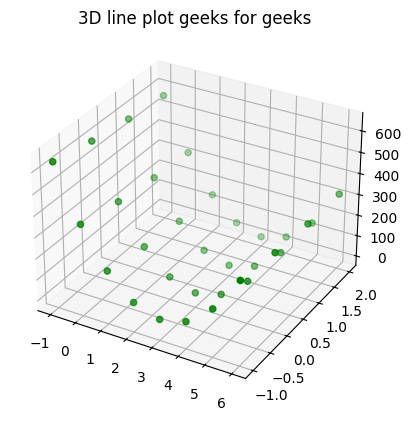

In [26]:
from mpl_toolkits import mplot3d
m = np.arange(-1, 7)
c = np.arange(-1,3)
fig = plt.figure()
m_arr = []
c_arr = []
total_error_Arr = []
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
for i in m:
    for j in c:
        ycap = i*x + j
        error = (ycap - y)**2
        total_error = np.sum(error)
        m_arr.append(i)
        c_arr.append(j)
        total_error_Arr.append(total_error)
        print("m: ", i, "c: ", j, "error: ", total_error)

# Plotting the points
m_arr = np.array(m_arr)
c_arr = np.array(c_arr)
total_error_Arr = np.array(total_error_Arr)
ax.scatter3D(m_arr, c_arr, total_error_Arr, color='green')
#ax.plot_surface(m_arr, c_arr, total_error_Arr, color='green')
#plot_surface
#ax.plot3D(m_arr, c_arr, total_error_Arr, color='green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

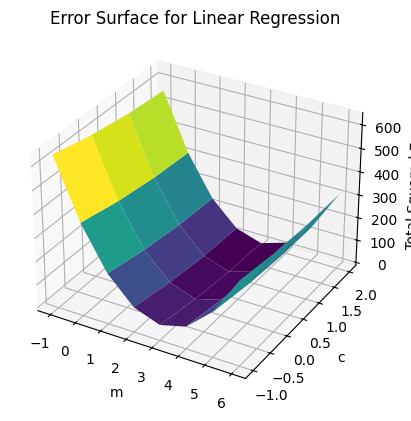

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
# Create grid for m and c
m_vals = np.arange(-1, 7)
c_vals = np.arange(-1, 3)
M, C = np.meshgrid(m_vals, c_vals)

# Calculate total squared error for each (m, c)
Z = np.zeros_like(M, dtype=float)  # Z will store total errors

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        m = M[i, j]
        c = C[i, j]
        y_pred = m * x + c
        error = (y_pred - y) ** 2
        total_error = np.sum(error)
        Z[i, j] = total_error

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, Z, cmap='viridis')
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Total Squared Error')
ax.set_title('Error Surface for Linear Regression')
plt.show()


In [52]:
import numpy as np
X1 = np.array([0,0,1,1])
X2 = np.array([0,1,1,0])
Y = np.array([0,1,1,1])

In [28]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [33]:
from tqdm.auto import tqdm

class MyLineFitViaGD:
    def __init__(self, learning_rate=0.0001, n_iters=10_000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        #self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # init parameters
        self.weights = np.random.randn(n_features)
        #self.bias = np.random.randn(1)
        # gradient descent
        tq = tqdm(range(self.n_iters), desc="Iterations")
        for _ in  tq:
            # approximate y with linear combination of weights and x, plus bias
            # y_predicted = np.matmul(X, self.weights) + self.bias
            y_predicted = np.matmul(X, self.weights)
            print("y_predicted: ", y_predicted)
            print("y: ", y)
            # compute the gap between true and predicted outputs.
            diff = y_predicted - y
            loss = np.sum(diff * diff)
            
            # compute gradients
            dw = (1 / n_samples) * np.matmul(X.T, diff)
            #db = (1 / n_samples) * np.sum(diff)
            # update parameters
            self.weights  = self.weights - self.lr * dw
            #self.bias  = self.bias -  self.lr * db
            
            # display the loss on the progress bar.
            tq.set_postfix({"Loss":loss})
            
    @property
    def parameters(self):
        #return self.bias, self.weights
        return self.weights
            
    def predict(self, X):
        #y_predicted = np.dot(X, self.weights) + self.bias
        y_predicted = np.dot(X, self.weights)
        return y_predicted

In [34]:
xx = [X1 , X2]
xx = np.array(xx).T
xx

array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 0]])

In [35]:
yy

array([0, 1, 1, 1])

In [53]:
## OR GATE

gdmodel = MyLineFitViaGD(learning_rate=0.1, n_iters=1000)
# fit the model and estimate the yhat values.
yy = Y
gdmodel.fit(xx, yy)
#get the learned parameters from the model.
weights = gdmodel.parameters
print(" Weights =", weights)
# use the model to predict the yhat values.
yhat6 = gdmodel.predict(xx)
# estimate the loss again and display
loss = SSE(yy, yhat6)
print ("Loss =", loss)

Iterations:  12%|█▏        | 121/1000 [00:00<00:00, 1202.00it/s, Loss=0.333]

y_predicted:  [ 0.         -0.47789509  1.01181285  1.48970794]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.44124304  1.03592689  1.47716992]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.40611013  1.05823237  1.4643425 ]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.37241319  1.07886494  1.45127813]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.34007448  1.09795007  1.43802455]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.30902137  1.11560382  1.42462519]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.27918593  1.13193353  1.41111946]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.25050462  1.14703852  1.39754314]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.22291797  1.16101063  1.3839286 ]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.19637029  1.17393483  1.37030512]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.1708094   1.18588972  1.35669912]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.14618641  1.19694799  1.3431344 ]
y:  [0 1 1 1]
y_predicted:  [ 0.         -0.12245545  1.20717689  1.32963234]


Iterations:  40%|████      | 404/1000 [00:00<00:00, 1372.18it/s, Loss=0.333]

y_predicted:  [0.         0.66301132 1.33333332 0.670322  ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66310271 1.33333332 0.67023062]
y:  [0 1 1 1]
y_predicted:  [0.         0.66319181 1.33333332 0.67014152]
y:  [0 1 1 1]
y_predicted:  [0.         0.66327868 1.33333332 0.67005465]
y:  [0 1 1 1]
y_predicted:  [0.         0.66336338 1.33333333 0.66996995]
y:  [0 1 1 1]
y_predicted:  [0.         0.66344596 1.33333333 0.66988737]
y:  [0 1 1 1]
y_predicted:  [0.         0.66352648 1.33333333 0.66980685]
y:  [0 1 1 1]
y_predicted:  [0.         0.66360498 1.33333333 0.66972834]
y:  [0 1 1 1]
y_predicted:  [0.         0.66368153 1.33333333 0.6696518 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66375615 1.33333333 0.66957717]
y:  [0 1 1 1]
y_predicted:  [0.         0.66382892 1.33333333 0.66950441]
y:  [0 1 1 1]
y_predicted:  [0.         0.66389986 1.33333333 0.66943347]
y:  [0 1 1 1]
y_predicted:  [0.         0.66396903 1.33333333 0.6693643 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66403647 1

Iterations:  69%|██████▉   | 691/1000 [00:00<00:00, 1395.00it/s, Loss=0.333]

y_predicted:  [0.         0.66666173 1.33333333 0.6666716 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666186 1.33333333 0.66667148]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666198 1.33333333 0.66667136]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666209 1.33333333 0.66667124]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666221 1.33333333 0.66667112]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666232 1.33333333 0.66667101]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666243 1.33333333 0.6666709 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666253 1.33333333 0.6666708 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666264 1.33333333 0.6666707 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666274 1.33333333 0.66667059]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666284 1.33333333 0.6666705 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666293 1.33333333 0.6666704 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666303 1.33333333 0.66667031]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666312 1

Iterations: 100%|██████████| 1000/1000 [00:00<00:00, 1403.79it/s, Loss=0.333]

y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1.33333333 0.66666667]
y:  [0 1 1 1]
y_predicted:  [0.         0.66666666 1

In [ ]:
## XOR GATE

gdmodel = MyLineFitViaGD(learning_rate=0.1, n_iters=1000)
# fit the model and estimate the yhat values.
yy = Y
gdmodel.fit(xx, yy)
#get the learned parameters from the model.
weights = gdmodel.parameters
print(" Weights =", weights)
# use the model to predict the yhat values.
yhat6 = gdmodel.predict(xx)
# estimate the loss again and display
loss = SSE(yy, yhat6)
print ("Loss =", loss)

Iterations:   8%|▊         | 84/1000 [00:00<00:01, 835.23it/s, Loss=1.33]

y_predicted:  [0.         1.4618287  2.71103975 1.24921105]
y:  [0 1 0 1]
y_predicted:  [0.         1.38250699 2.55771177 1.17520478]
y:  [0 1 0 1]
y_predicted:  [0.         1.30900152 2.41588338 1.10688187]
y:  [0 1 0 1]
y_predicted:  [0.         1.24087939 2.28469213 1.04381274]
y:  [0 1 0 1]
y_predicted:  [0.         1.17774011 2.16334022 0.98560011]
y:  [0 1 0 1]
y_predicted:  [0.         1.1192131  2.0510897  0.93187661]
y:  [0 1 0 1]
y_predicted:  [0.         1.06495553 1.94725798 0.88230245]
y:  [0 1 0 1]
y_predicted:  [0.         1.01465019 1.85121363 0.83656344]
y:  [0 1 0 1]
y_predicted:  [0.         0.96800359 1.76237261 0.79436901]
y:  [0 1 0 1]
y_predicted:  [0.         0.92474419 1.68019466 0.75545047]
y:  [0 1 0 1]
y_predicted:  [0.         0.88462072 1.60418006 0.71955934]
y:  [0 1 0 1]
y_predicted:  [0.         0.8474007  1.53386656 0.68646586]
y:  [0 1 0 1]
y_predicted:  [0.         0.81286902 1.46882656 0.65595755]
y:  [0 1 0 1]
y_predicted:  [0.         0.78082663 1

Iterations:  36%|███▌      | 356/1000 [00:00<00:00, 1242.03it/s, Loss=1.33]

y_predicted:  [0.         0.33417789 0.66666736 0.33248947]
y:  [0 1 0 1]
y_predicted:  [0.         0.33415676 0.66666731 0.33251055]
y:  [0 1 0 1]
y_predicted:  [0.         0.33413616 0.66666726 0.3325311 ]
y:  [0 1 0 1]
y_predicted:  [0.         0.33411607 0.66666722 0.33255114]
y:  [0 1 0 1]
y_predicted:  [0.         0.33409649 0.66666718 0.33257069]
y:  [0 1 0 1]
y_predicted:  [0.         0.3340774  0.66666714 0.33258974]
y:  [0 1 0 1]
y_predicted:  [0.         0.33405879 0.6666671  0.33260832]
y:  [0 1 0 1]
y_predicted:  [0.         0.33404064 0.66666707 0.33262643]
y:  [0 1 0 1]
y_predicted:  [0.         0.33402295 0.66666704 0.33264409]
y:  [0 1 0 1]
y_predicted:  [0.         0.3340057  0.66666701 0.33266132]
y:  [0 1 0 1]
y_predicted:  [0.         0.33398888 0.66666699 0.33267811]
y:  [0 1 0 1]
y_predicted:  [0.         0.33397248 0.66666696 0.33269448]
y:  [0 1 0 1]
y_predicted:  [0.         0.3339565  0.66666694 0.33271044]
y:  [0 1 0 1]
y_predicted:  [0.         0.33394091 0

Iterations:  63%|██████▎   | 633/1000 [00:00<00:00, 1323.74it/s, Loss=1.33]

y_predicted:  [0.         0.33333459 0.66666667 0.33333207]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333456 0.66666667 0.3333321 ]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333453 0.66666667 0.33333213]
y:  [0 1 0 1]
y_predicted:  [0.         0.3333345  0.66666667 0.33333216]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333447 0.66666667 0.33333219]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333444 0.66666667 0.33333222]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333442 0.66666667 0.33333225]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333439 0.66666667 0.33333228]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333436 0.66666667 0.3333323 ]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333434 0.66666667 0.33333233]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333431 0.66666667 0.33333235]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333429 0.66666667 0.33333238]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333426 0.66666667 0.3333324 ]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333424 0

Iterations:  91%|█████████ | 906/1000 [00:00<00:00, 1343.83it/s, Loss=1.33]

y_predicted:  [0.         0.33333334 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333334 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333334 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0

Iterations: 100%|██████████| 1000/1000 [00:00<00:00, 1283.25it/s, Loss=1.33]

y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0.66666667 0.33333333]
y:  [0 1 0 1]
y_predicted:  [0.         0.33333333 0

In [54]:
X3 = X1*X2
xx = [X1 , X2, X3]
xx = np.array(xx).T
xx

array([[0, 0, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 0, 0]])

In [55]:
## XOR GATE

gdmodel = MyLineFitViaGD(learning_rate=0.1, n_iters=1000)
# fit the model and estimate the yhat values.
yy = Y
gdmodel.fit(xx, yy)
#get the learned parameters from the model.
weights = gdmodel.parameters
print(" Weights =", weights)
# use the model to predict the yhat values.
yhat6 = gdmodel.predict(xx)
# estimate the loss again and display
loss = SSE(yy, yhat6)
print ("Loss =", loss)

Iterations:  11%|█▏        | 113/1000 [00:00<00:00, 1124.14it/s, Loss=0.104]

y_predicted:  [ 0.          1.25032765  0.14365261 -2.09384995]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.26547814  0.27896672 -1.99509501]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.27686702  0.40128464 -1.90219181]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.28491323  0.51182141 -1.81466913]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.28999486  0.6116787  -1.73209793]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.29245302  0.70185538 -1.65408745]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.29259531  0.78325709 -1.58028165]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.290699    0.85670496 -1.51035604]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.2870139   0.92294352 -1.44401476]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.28176497  0.98264777 -1.38098798]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.27515465  1.03642977 -1.32102947]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.26736504  1.0848444  -1.26391448]
y:  [0 1 1 1]
y_predicted:  [ 0.          1.2585598   1.12839481 -1.20943773]


Iterations:  37%|███▋      | 374/1000 [00:00<00:00, 1201.27it/s, Loss=0.00582]

y_predicted:  [0.         0.80595019 1.14683854 0.79287945]
y:  [0 1 1 1]
y_predicted:  [0.         0.80713047 1.14585491 0.7943865 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.80830584 1.14487787 0.79588047]
y:  [0 1 1 1]
y_predicted:  [0.         0.80947624 1.14390737 0.79736151]
y:  [0 1 1 1]
y_predicted:  [0.         0.81064165 1.14294337 0.79882979]
y:  [0 1 1 1]
y_predicted:  [0.         0.81180203 1.14198583 0.80028546]
y:  [0 1 1 1]
y_predicted:  [0.         0.81295733 1.14103471 0.80172867]
y:  [0 1 1 1]
y_predicted:  [0.         0.81410753 1.14008996 0.80315959]
y:  [0 1 1 1]
y_predicted:  [0.         0.81525259 1.13915153 0.80457835]
y:  [0 1 1 1]
y_predicted:  [0.         0.81639249 1.13821939 0.8059851 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.81752719 1.1372935  0.80737999]
y:  [0 1 1 1]
y_predicted:  [0.         0.81865668 1.13637381 0.80876315]
y:  [0 1 1 1]
y_predicted:  [0.         0.81978091 1.13546028 0.81013473]
y:  [0 1 1 1]
y_predicted:  [0.         0.82089988 1

Iterations:  63%|██████▎   | 632/1000 [00:00<00:00, 1245.53it/s, Loss=0.000208]

y_predicted:  [0.         0.95242637 1.03484754 0.95236839]
y:  [0 1 1 1]
y_predicted:  [0.         0.95274452 1.0346141  0.95268799]
y:  [0 1 1 1]
y_predicted:  [0.         0.95306055 1.03438223 0.95300544]
y:  [0 1 1 1]
y_predicted:  [0.         0.95337449 1.03415192 0.95332074]
y:  [0 1 1 1]
y_predicted:  [0.         0.95368633 1.03392314 0.95363393]
y:  [0 1 1 1]
y_predicted:  [0.         0.95399609 1.0336959  0.953945  ]
y:  [0 1 1 1]
y_predicted:  [0.         0.95430379 1.03347018 0.95425398]
y:  [0 1 1 1]
y_predicted:  [0.         0.95460944 1.03324597 0.95456087]
y:  [0 1 1 1]
y_predicted:  [0.         0.95491305 1.03302327 0.9548657 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.95521465 1.03280205 0.95516848]
y:  [0 1 1 1]
y_predicted:  [0.         0.95551423 1.03258232 0.95546922]
y:  [0 1 1 1]
y_predicted:  [0.         0.95581182 1.03236406 0.95576793]
y:  [0 1 1 1]
y_predicted:  [0.         0.95610742 1.03214726 0.95606463]
y:  [0 1 1 1]
y_predicted:  [0.         0.95640105 1

Iterations:  76%|███████▌  | 757/1000 [00:00<00:00, 1012.89it/s, Loss=2.8e-5]  

y_predicted:  [0.         0.99101095 1.00658048 0.99101084]
y:  [0 1 1 1]
y_predicted:  [0.         0.99107116 1.0065364  0.99107105]
y:  [0 1 1 1]
y_predicted:  [0.         0.99113097 1.00649262 0.99113087]
y:  [0 1 1 1]
y_predicted:  [0.         0.99119038 1.00644913 0.99119028]
y:  [0 1 1 1]
y_predicted:  [0.         0.99124939 1.00640592 0.9912493 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.99130801 1.00636301 0.99130792]
y:  [0 1 1 1]
y_predicted:  [0.         0.99136624 1.00632039 0.99136614]
y:  [0 1 1 1]
y_predicted:  [0.         0.99142407 1.00627805 0.99142398]
y:  [0 1 1 1]
y_predicted:  [0.         0.99148152 1.00623599 0.99148143]
y:  [0 1 1 1]
y_predicted:  [0.         0.99153858 1.00619422 0.99153849]
y:  [0 1 1 1]
y_predicted:  [0.         0.99159526 1.00615273 0.99159517]
y:  [0 1 1 1]
y_predicted:  [0.         0.99165156 1.00611151 0.99165148]
y:  [0 1 1 1]
y_predicted:  [0.         0.99170748 1.00607057 0.9917074 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.99176303 1

Iterations: 100%|██████████| 1000/1000 [00:00<00:00, 1134.30it/s, Loss=2.85e-6]

y_predicted:  [0.         0.99669795 1.00241727 0.99669794]
y:  [0 1 1 1]
y_predicted:  [0.         0.99672007 1.00240108 0.99672006]
y:  [0 1 1 1]
y_predicted:  [0.         0.99674204 1.00238499 0.99674204]
y:  [0 1 1 1]
y_predicted:  [0.         0.99676386 1.00236902 0.99676386]
y:  [0 1 1 1]
y_predicted:  [0.         0.99678554 1.00235315 0.99678554]
y:  [0 1 1 1]
y_predicted:  [0.         0.99680707 1.00233739 0.99680707]
y:  [0 1 1 1]
y_predicted:  [0.         0.99682846 1.00232173 0.99682846]
y:  [0 1 1 1]
y_predicted:  [0.         0.99684971 1.00230618 0.9968497 ]
y:  [0 1 1 1]
y_predicted:  [0.         0.99687081 1.00229073 0.99687081]
y:  [0 1 1 1]
y_predicted:  [0.         0.99689177 1.00227538 0.99689177]
y:  [0 1 1 1]
y_predicted:  [0.         0.99691259 1.00226014 0.99691259]
y:  [0 1 1 1]
y_predicted:  [0.         0.99693327 1.002245   0.99693327]
y:  [0 1 1 1]
y_predicted:  [0.         0.99695382 1.00222996 0.99695382]
y:  [0 1 1 1]
y_predicted:  [0.         0.99697422 1

In [57]:
xx = [X1 , X2]
xx = np.array(xx).T
xx

array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 0]])

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(xx, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat4 = model.predict(xx)

Intercept= 0.25000000000000006 Beta =  [0.5 0.5]


In [59]:
loss = SSE(yy, yhat4)
print("SSE = ", loss)

SSE =  0.25


In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 2)   # 10, 11
X_poly = poly_transformer.fit_transform(xx)

In [80]:
xx

array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 0]])

In [84]:
X_poly

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 0., 0.]])

In [76]:
yy

array([0, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat4 = model.predict(X_poly)

loss = SSE(yy, yhat4)
print("SSE = ", loss)

Intercept= 6.661338147750939e-16 Beta =  [-5.55111512e-16  5.00000000e-01  5.00000000e-01  5.00000000e-01
 -1.00000000e+00  5.00000000e-01]
SSE =  2.588449845256445e-31


In [ ]:
from sklearn.linear_model import Lasso, Ridge
model5 = Lasso(alpha=500, max_iter=50000).fit(X_poly, yy)
#model5 = Ridge(alpha=5220).fit(X_poly,yy)
print("Beta =", model5.coef_)
yhat5 = model5.predict(X_poly)
loss = SSE(yy, yhat5)
print("SSE =", loss)

Beta = [0.00000000e+00 9.57441738e-05 9.57441738e-05 9.57441738e-05
 4.78491618e-05 9.57441738e-05]
SSE = 0.7495931921018534


In [87]:
yhat5

array([0.74979655, 0.74998804, 0.75022738, 0.74998804])

In [88]:
yy

array([0, 1, 1, 1])

In [79]:
yhat4

array([1.11022302e-16, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [81]:
def activation(x):
    if x>0.5:
        return 1
    else:
        return 0

In [ ]:
activation()